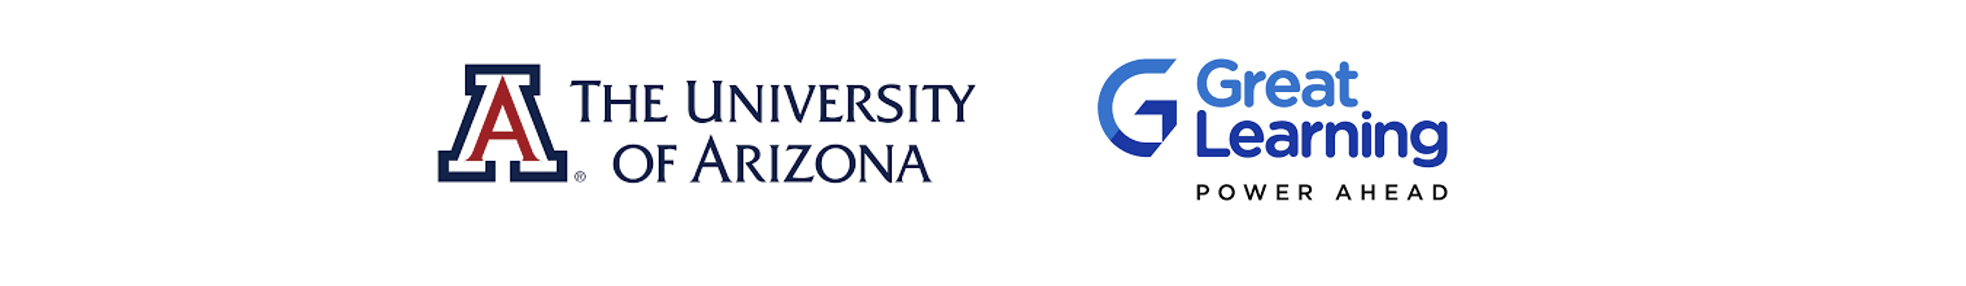

# **<font color='blue'>Agenda**


- Introduction to Linear Regression Models
- Multivariate Linear Regression
- Ordinary Least Square Method
- Assumptions in Linear Regression
- Multicollinearity
- Regression Errors
- Regularizing Linear Models
- Case Study

# **<font color='darkblue'> Linear Regression**

# <font color='red'>Pop Up Quiz:</red>

---



 **Q1. In the context of linear regression, what is the dependent variable?**





A: The variable being predicted or estimated

**Q2. What does the slope of the regression line represent in linear regression?**


A: The change in the dependent variable for a one-unit change in the independent variable.

**Q3. What is the purpose of the R-squared (coefficient of determination) in linear regression?**

A: To measure the proportion of the variance in the dependent variable explained by the independent variables

# **<font color='blue'>Introduction to Linear Regression Models**

- The term "regression"  generally refers to predicting a real number. However, it can also be used for classification (predicting a category or class.)

- The term "linear" in the name “linear regression” refers to the fact that the method models data with linear combination of the explanatory variables.

- A linear combination is an expression where one or more variables are scaled by a constant factor and added together.

- In the case of linear regression with a single explanatory variable, the linear combination used in linear regression can be expressed as:

        response = intercept + constant ∗ explanatory

Mathematically correlation between two variables indicates how closely their relationship follows a straight line. By default we use Pearson’s correlation which ranges between -1 and +1.

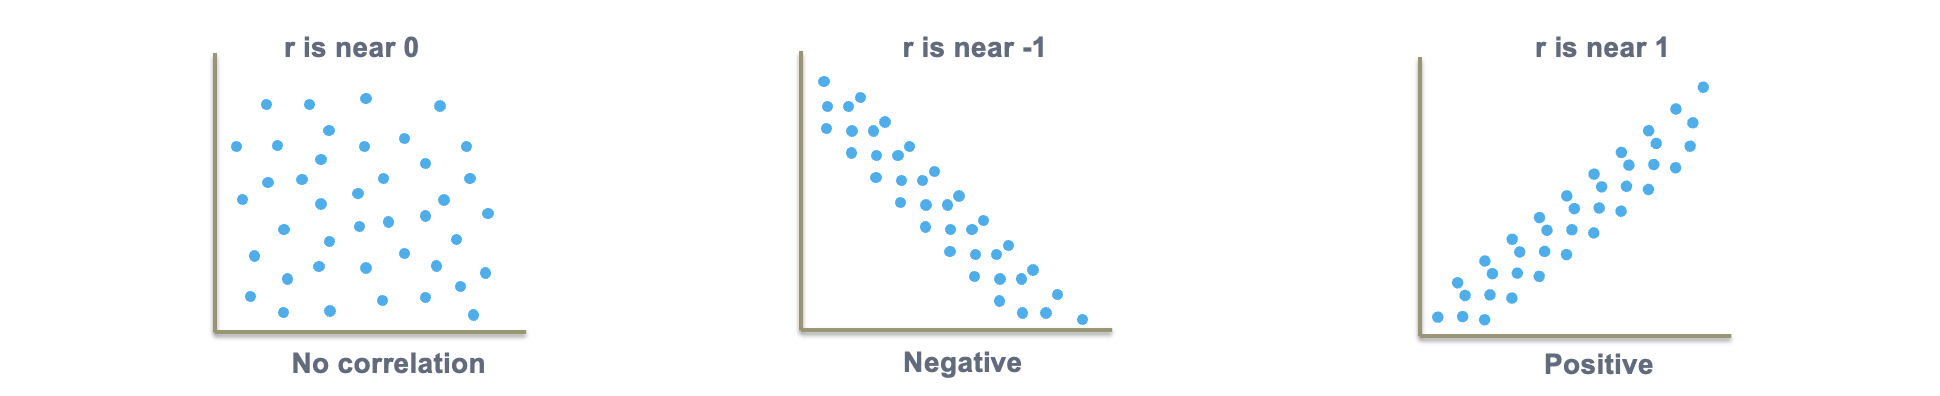

Correlation of extreme possible values of -1 and +1 indicate a perfectly linear relationship between X and Y whereas a correlation of 0 indicates absence of linear relationship
When r value is small, one needs to test whether it is statistically significant or not to believe that there is correlation or not


## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Simulating Data

In [75]:
import numpy as np
np.random.seed(10)
x = np.random.normal(0,1,100)  # Random samples from a standard normal data (normally distributed data with mean 0 and sd 1)

In [76]:
x[:10]

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021])

In [3]:
noise = np.random.normal(loc=0, scale=0.5, size=100) #random samples from normal distribution with mean 0, SD 0.5

In [8]:
noise[:10]

array([ 0.05873783, -0.95372844, -0.46145463,  0.23487572, -0.07218338,
       -0.20006918, -0.14799193,  0.4241043 ,  0.35341523, -0.39363446])

In [77]:
### Create target variable as a linear function of x and noise
y = -1 + 1.1 * x + noise
y[:10]

array([ 0.26430606,  0.19880968, -2.98109304, -0.0317832 , -0.98250626,
       -2.6724384 , -1.53329789, -1.32587441, -1.55483713, -0.21402078])

## Visualizing the data

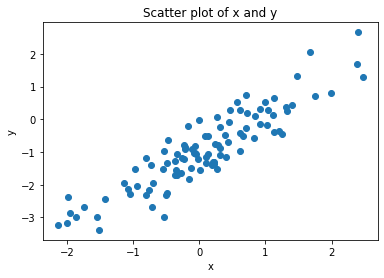

In [78]:
## Visualizing the data
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()

In [82]:
### Create target variable as a linear function of x and noise
y1 = -1 + 1.1 * x
y1[:10]

array([ 0.46474515, -0.21319313, -2.69994032, -1.00922223, -0.31653043,
       -1.79209412, -0.70793726, -0.88059662, -0.99527943, -1.19206023])

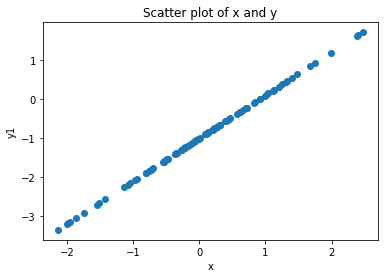

In [81]:
## Visualizing the data
import matplotlib.pyplot as plt
plt.scatter(x, y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.title('Scatter plot of x and y')
plt.show()

# **<font color='blue'> Multivariate Linear Regression**

- When more than two predictor variables are used to predict the value in the dependent variable
- The predictor variables are expected to be independent of one another i.e not correlate amongst themselves

## Structure of Linear Models

Y = m1X1 + m2X2+ ….. + mnXn + C + e

- Y = Dependent / target / predicted variable
- Xi  = Indepenedent / predictor variable
- mi = coefficients for the ith independent / predictor variable
- C =  constant / intercept / bias
- e =  residual error / unexplained variance / difference between actual and prediction

# **<font color='blue'> Ordinary Least Square Method**

Also known as “Linear least squares”, estimates the parameters (coefficients, bias) in a linear regression model by minimizing the sum of the squared errors /residuals.

This method defines the linear regression model as that line which while passing through the distribution of data points, minimizes the sum of the squared differences between the observed values and the predicted values

Let  Yp be the predicted value of Y (the actual value) for a given independent variable value of X

Let m and c be the coefficient and the bias respectively

The linear model thus is **Yp  = mX +  c**
        
Error in prediction =  **Y – Yp =  Y – (mX + c)**

We have to find the m and c (best m and c) which minimizes the error

Finding the best m –>   **(corr (X,Y) * stddev_Y ) / stddev_X**

Finding the best c  ->  **Ybar – m_best * Xbar**


## Building an OLS model

In [89]:
import statsmodels.api as sm

In [90]:
X = sm.add_constant(x)

In [91]:
X[:10]

array([[ 1.        ,  1.3315865 ],
       [ 1.        ,  0.71527897],
       [ 1.        , -1.54540029],
       [ 1.        , -0.00838385],
       [ 1.        ,  0.62133597],
       [ 1.        , -0.72008556],
       [ 1.        ,  0.26551159],
       [ 1.        ,  0.10854853],
       [ 1.        ,  0.00429143],
       [ 1.        , -0.17460021]])

In [92]:
type(X)

numpy.ndarray

In [93]:
model1 = sm.OLS(y, X).fit()

In [94]:
model1.predict()[:10]

array([ 0.47188156, -0.20715208, -2.69791712, -1.00446733, -0.31065634,
       -1.78860411, -0.70269557, -0.8756339 , -0.990502  , -1.18760074])

In [95]:
y[:10]

array([ 0.26430606,  0.19880968, -2.98109304, -0.0317832 , -0.98250626,
       -2.6724384 , -1.53329789, -1.32587441, -1.55483713, -0.21402078])

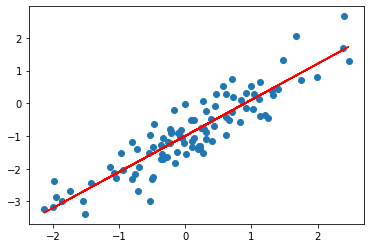

In [96]:
# plot scatter plot of y vs x
plt.scatter(x, y)

# add regression line
plt.plot(x, model1.predict(), color='red')

plt.show()

In [97]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     440.6
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           4.83e-38
Time:                        20:44:26   Log-Likelihood:                -73.071
No. Observations:                 100   AIC:                             150.1
Df Residuals:                      98   BIC:                             155.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9952      0.051    -19.542      0.000      -1.096      -0.894
x1             1.1018      0.052     20.992      0.000       0.998       1.206
==============================================================================
Omnibus:                        0.377   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.511
Skew:                           0.128   Prob(JB):                        0.774
Kurtosis:                       2.760   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since we created the data ourselves, we know 1.1 is the right coefficient for x1.
#### The model is able to generate results which is very close inspite of the noise superimposed on the data

In [100]:
np.corrcoef(x,y)

array([[1.      , 0.904468],
       [0.904468, 1.      ]])

In [102]:
0.904468**2

0.818062363024

In [103]:
model1.params

array([-0.9952302 ,  1.10177728])

In [104]:
model1.conf_int() #Confidence Interval for each of the coefficients

array([[-1.09629423, -0.89416617],
       [ 0.99761923,  1.20593532]])

## Adding more noise to the model

In [105]:
# Now let's add more noise by increasing the variance of the noise component

noise2 = np.random.normal(loc=0, scale=0.8, size=100)
y = -1 + 1.1 * x + noise2

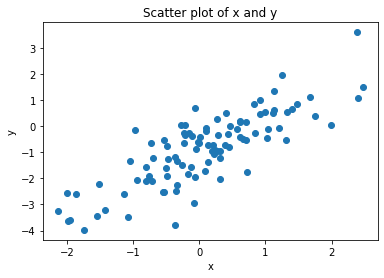

In [106]:
## Visualizing the data

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()


In [107]:
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.51e-25
Time:                        20:50:40   Log-Likelihood:                -117.89
No. Observations:                 100   AIC:                             239.8
Df Residuals:                      98   BIC:                             245.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9489      0.080    -11.901      0.0

#### Notice that the estimation of coefficient is not as accurate as earlier. It is still close

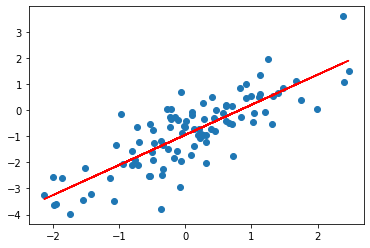

In [108]:
# plot scatter plot of y vs x
plt.scatter(x, y)

# add regression line
plt.plot(x, model2.predict(), color='red')

plt.show()

In [109]:
model2.params

array([-0.94885497,  1.1530458 ])

In [110]:
model2.conf_int()

array([[-1.10706821, -0.79064174],
       [ 0.98998896,  1.31610265]])

In [111]:
## Now let's increase the noise component further
noise3 = np.random.normal(loc=0, scale=20, size=100)
y = -1 + 1.1 * x + noise3

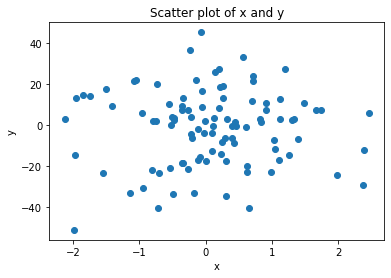

In [113]:
## Visualizing the data

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()


In [114]:
model3 = sm.OLS(y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02580
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.873
Time:                        20:51:49   Log-Likelihood:                -432.31
No. Observations:                 100   AIC:                             868.6
Df Residuals:                      98   BIC:                             873.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4151      1.850     -0.765      0.4

#### Notice the change in coefficients and the p-value of hypothesis test

In [31]:
model3.params

array([0.45054643, 2.87887218])

In [32]:
model3.conf_int()

array([[-3.28794645,  4.18903932],
       [-0.97407248,  6.73181685]])

# **<font color='blue'> Assumptions in Linear Regression**

The assumptions of linear regression are as follows:

1. Linearity: There is a linear relationship between the dependent variable and the independent variables. This assumption implies that the relationship between the variables can be represented by a straight line.

2. Independence: The observations in the dataset are independent of each other. This assumption assumes that there is no correlation or dependence between the observations.

3. Homoscedasticity: The variance of the errors or residuals is constant across all levels of the independent variables. In other words, the spread of the residuals should be consistent across the range of predicted values.

4. Normality: The errors or residuals follow a normal distribution. This assumption is important for making statistical inferences and hypothesis testing.

5. No multicollinearity: The independent variables used in the regression model are not highly correlated with each other. High multicollinearity can cause instability in the estimates of the regression coefficients.

6. No endogeneity: There is no relationship between the errors or residuals and the independent variables. Endogeneity occurs when there is a feedback loop between the dependent variable and the independent variables, which can bias the regression results.

7. No influential outliers: There are no influential outliers in the data that disproportionately influence the regression results. Outliers can significantly affect the estimated regression coefficients and can distort the model's predictions.

It is important to check and meet these assumptions to ensure the validity and reliability of the linear regression model and its results. Violations of these assumptions may lead to biased estimates, unreliable predictions, and erroneous statistical inferences.


# **<font color='blue'> Multi-Collinearity**


Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, it is a situation where there is a strong linear relationship between two or more predictor variables, making it difficult for the model to distinguish the individual effects of each variable on the dependent variable.

##  Types of Multi-Collinearity

- **Structural multicollinearity**: This type occurs when we create features from existing features and build a model using all of the features. For example, using “Radius” and “Area” as two variables. When features are generated, ensure the generated feature and the original features do not strongly correlate, if they do, you may want to drop the original feature as long as the generated feature contains all the information from the original


- **Data multicollinearity**: This type of multicollinearity is an artifact of the data itself. The nature of the variables is such that they correlate. For e.g. in auto-mpg.csv, the columns “weight” and “horsepower” of a car will correlate positively. In case there are such correlating variables in the data, they may be combined into a composite variable using techniques such as PCA

- The problem with having multi-collinearity is in the inability to understand how one variable influences the target. There is no way to estimate separate influence of each variable on target. Thus no way to estimate the partial regression coefficients

- If multicollinearity is perfect, the regression coefficients of X variables are indeterminate and their standard errors are infinite

- If multicollinearity is less than perfect, the regression coefficients, although determinate, posses large standard errors, which means the coefficients cannot be estimated with confidence

- High degree of multicollinearity will not take away the property of being best unbiased linear estimators. It violates none of the regression assumptions. The only problem is that it will result in hard to determine coefficients with small standard errors

## Example

In [115]:
import numpy as np
np.random.seed(1)
x1 = np.random.normal(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
noise = np.random.normal(loc=0, scale=0.5, size=100)

y = 1+2.5*x1-0.8*x2+noise

In [116]:
corr = np.corrcoef(x1, x2)

In [117]:
corr

array([[1.        , 0.97947512],
       [0.97947512, 1.        ]])

In [121]:
corr = np.corrcoef(x1, y)
corr

array([[1.        , 0.96577286],
       [0.96577286, 1.        ]])

In [122]:
corr = np.corrcoef(x2, y)
corr

array([[1.        , 0.94882594],
       [0.94882594, 1.        ]])

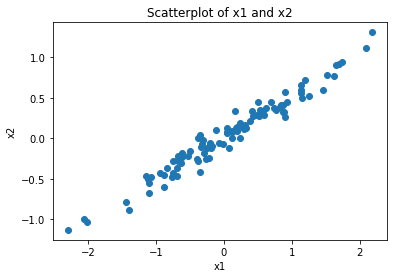

In [118]:
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 and x2")
plt.show()

In [119]:
X = sm.add_constant(np.column_stack((x1, x2)))
model4 = sm.OLS(y, X).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     674.5
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.23e-57
Time:                        21:07:19   Log-Likelihood:                -70.927
No. Observations:                 100   AIC:                             147.9
Df Residuals:                      97   BIC:                             155.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9901      0.051     19.539      0.0

##### What are your observations about the sign of the coefficients and the p-values?

In [124]:
X = sm.add_constant(x1)
model5 = sm.OLS(y, X).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1359.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.07e-59
Time:                        21:12:04   Log-Likelihood:                -71.078
No. Observations:                 100   AIC:                             146.2
Df Residuals:                      98   BIC:                             151.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9944      0.050     19.939      0.0

In [126]:
X = sm.add_constant(x2)
model5 = sm.OLS(y, X).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     884.7
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           7.41e-51
Time:                        21:12:30   Log-Likelihood:                -90.756
No. Observations:                 100   AIC:                             185.5
Df Residuals:                      98   BIC:                             190.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9416      0.061     15.469      0.0

# **<font color='blue'> Regression Errors**

## Error in the linear model

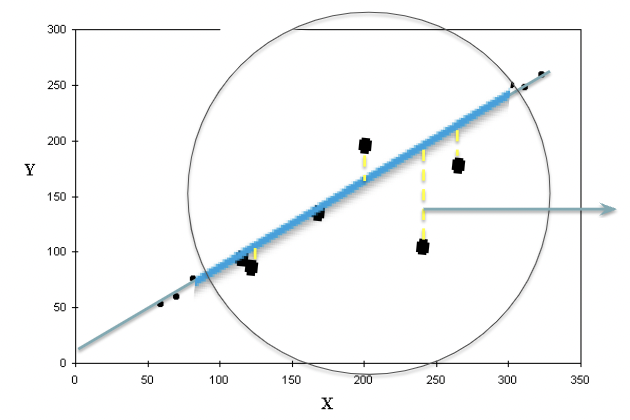

- The distance between a point and the line is the error in prediction

- That line which gives least sum of squared errors is considered as the best line

    Error = (T – (mx + C)


- Sum of all errors can cancel out  and give 0
- We square all the errors and sum it up. That line which gives us least sum of squared errors is the best fit

## Analyzing the Errors

Analyzing the regression errors can provide valuable insights into the performance and assumptions of the regression model. Some important aspects related to regression errors include:

**Residual Analysis**: By examining the pattern of the residuals, such as plotting them against the predicted values or the independent variables, it is possible to assess the assumptions of the regression model, such as linearity, homoscedasticity, and normality.

**Outlier Detection**: Unusual or influential observations in the dataset can lead to large residuals. Identifying and analyzing these outliers can help understand their impact on the model and determine if they should be included or excluded from the analysis.

**Model Evaluation**: Various metrics, such as the mean squared error (MSE), root mean squared error (RMSE), or R-squared, are calculated based on the regression errors to evaluate the overall performance and predictive accuracy of the model.

**Model Improvement**: By examining the patterns or trends in the residuals, researchers may identify areas where the model can be improved, such as by including additional variables, transforming variables, or using alternative modeling techniques.

Overall, regression errors provide valuable information for understanding the quality and limitations of a regression model and guide further analysis and model refinement.

# **<font color='blue'> Regularizing the linear Models**

Regularization is a technique used in linear regression models to prevent overfitting and improve the model's generalization performance. It adds a penalty term to the loss function that shrinks the coefficients towards zero, reducing their magnitudes and controlling model complexity. Two common regularization techniques for linear models are Ridge regression and Lasso regression.

## Ridge Regression

Ridge regression, also known as Tikhonov regularization, adds the L2 norm (squared magnitude) of the coefficients as a penalty term to the loss function. The Ridge regression objective function is the sum of squared errors plus the L2 penalty term multiplied by a regularization parameter, alpha:

Loss Function = Sum of Squared Errors + alpha * (L2 norm of coefficients)

The alpha parameter controls the amount of regularization applied, with higher values resulting in greater shrinkage of coefficients. Ridge regression can help mitigate multicollinearity and stabilize coefficient estimates.

### Key properties and benefits of Ridge regression:


- The L2 penalty term encourages small but non-zero coefficient values, making Ridge regression suitable when all features are potentially relevant.
- Ridge regression is differentiable and has a closed-form solution, allowing for efficient computation.
- It reduces the impact of high-variance features, resulting in a more stable and interpretable model.
- Ridge regression can be used for both single-variable and multiple-variable regression problems.

## Lasso Regression

Lasso regression, short for "Least Absolute Shrinkage and Selection Operator," adds the L1 norm (sum of absolute magnitudes) of the coefficients as a penalty term. The Lasso regression objective function is the sum of squared errors plus the L1 penalty term multiplied by the regularization parameter, alpha:

Loss Function = Sum of Squared Errors + alpha * (L1 norm of coefficients)

Similar to Ridge regression, the alpha parameter controls the amount of regularization applied. However, Lasso regression has the advantage of encouraging sparsity in the coefficient values, effectively performing feature selection.

### Key properties and benefits of Lasso regression:

The L1 penalty term encourages some coefficients to be exactly zero, effectively performing feature selection and producing a sparse model.
Lasso regression is particularly useful when dealing with high-dimensional datasets with many irrelevant or redundant features.
It can help identify the most important predictors, leading to a more interpretable model.
Lasso regression can handle collinearity and automatically eliminate redundant variables from the model.

Both Ridge and Lasso regression have their strengths and can be effective in different scenarios. Ridge regression tends to be useful when all predictors are potentially relevant, while Lasso regression shines in situations where feature selection and sparsity are desired. Additionally, there is also Elastic Net regression, which combines both L1 and L2 penalties, providing a balance between Ridge and Lasso regularization.

# **<font color='blue'> Case Study**

## Objective

We will be using advertising data to predict sales from different mode of advertisements

## Importing necessary libraries and overview of the dataset

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm

from scipy.optimize import fsolve

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

In [128]:
ad_df = pd.read_csv('Advertising.csv')

In [129]:
ad_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [130]:
ad_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Preprocessing and Exploratory Data Analysis

In [131]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- All columns are numeric in nature. If there are categorical variables in the data, one hot encoding or label encoding need to be done.
- Data seems to be properly populated as well (No missing data). If there were missing data, it should be treated as well.

The following steps should be performed at this step in the process.
1. EDA need to be performed and if required, outlier treatment need to be done.
2. Correlation matrix, Pairplots, Variance Inflation Factor (VIF) need to be looked at as well.
3.  The data need to be split into train and test. Model Development should be done on train data and validation should be done on test data

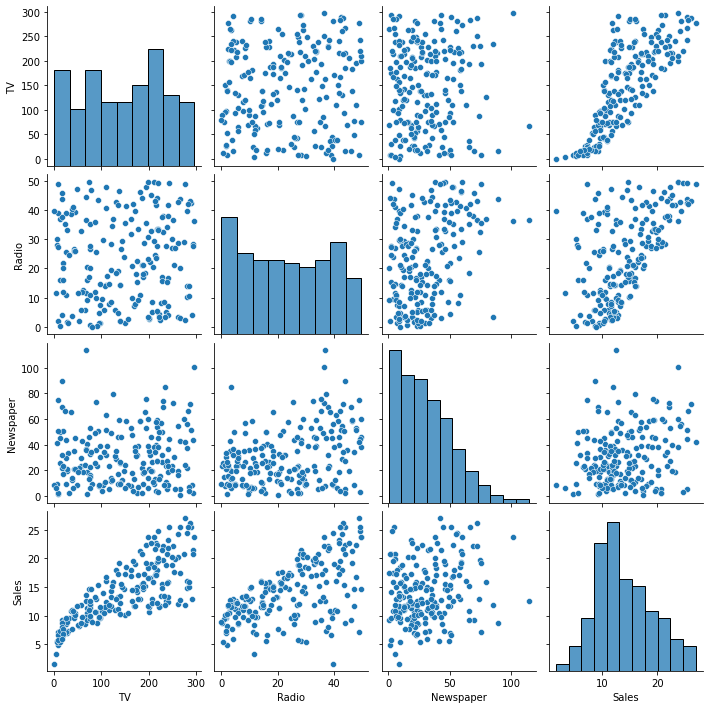

In [46]:
sns.pairplot(ad_df)

<AxesSubplot:>

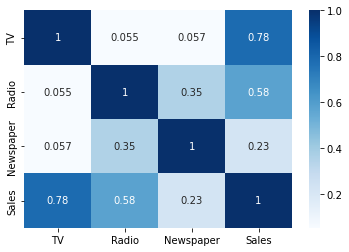

In [47]:
sns.heatmap(ad_df.corr(),cmap='Blues',annot=True)

**Observations**

- All 3 independent variables show positive correlation with Sales (which makes business sense)
- Multi Collinearity doesn't seem to be a big problem (with a possible of exception of Radio vs Newspaper

## Separate independent and dependent variables

In [132]:
x = ad_df['TV']
y = ad_df['Sales']

## Simple Linear Regression

In [133]:
x=sm.add_constant(x)

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [134]:
simple_linear=sm.OLS(y,x).fit()

In [135]:
simple_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        21:25:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Here Null Hypothesis is that there is no relationship between predictor and target.
- Since p_value is low, Null hypothesis can be rejected which means the coefficient estimated by the model is statistically significant

## Using Model to Predict Sales from TV Spend

In [136]:
tv_spend = pd.DataFrame({'const': 1, 'TV': [250]})
tv_pred = sm.add_constant(tv_spend)
pred_value = simple_linear.get_prediction(tv_pred)
print(pred_value.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  18.916754  0.360324      18.206189      19.627319     12.451461   

   obs_ci_upper  
0     25.382047  


/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
7.036+0.0475*250

18.911

## Inverse Prediction to estimate TV Spend from Sales

In [54]:
# Define a function for inverse prediction
def inverse_prediction(x, y_pred):
    X = np.array([1, x]).astype(np.float64)
    y = simple_linear.predict(X)
    return y - y_pred

# Set the output value predicted earlier
y_pred = 18.916754

# Use fsolve to find the input value
x_pred = fsolve(inverse_prediction, x0=100, args=(y_pred,))

/var/folders/mw/79vr7p9566z6fwqnpsmrj8tc0000gq/T/ipykernel_21767/608577712.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([1, x]).astype(np.float64)


In [55]:
x_pred

array([250.00000721])

## Plotting the data and fitted line

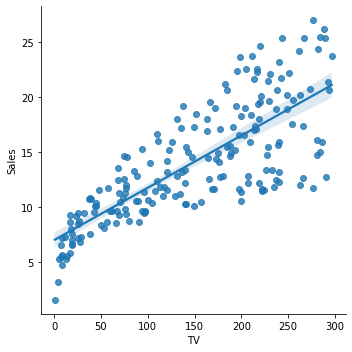

In [138]:
sns.lmplot(x="TV", y="Sales",data=ad_df)

**Diagnostic Plots**

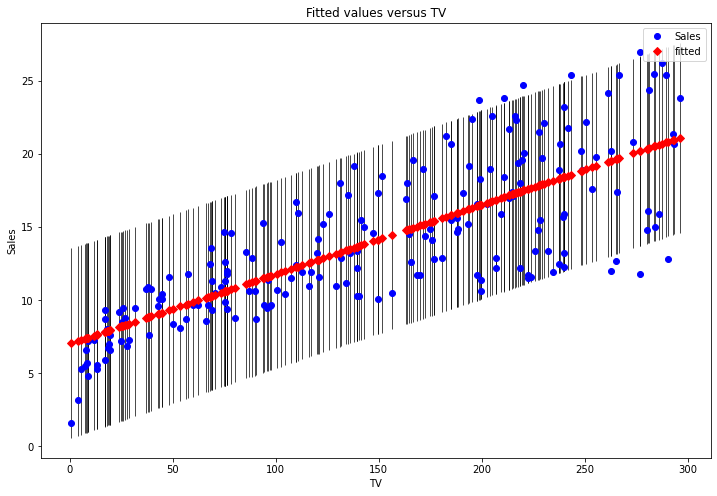

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_fit(simple_linear, 1, ax=ax)
plt.show()

## Multiple Linear Regression

In [139]:
x = ad_df[['TV','Radio','Newspaper']]

In [140]:
x_ct=sm.add_constant(x)

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [141]:
multi_linear=sm.OLS(y,x_ct).fit()

In [142]:
multi_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        21:30:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

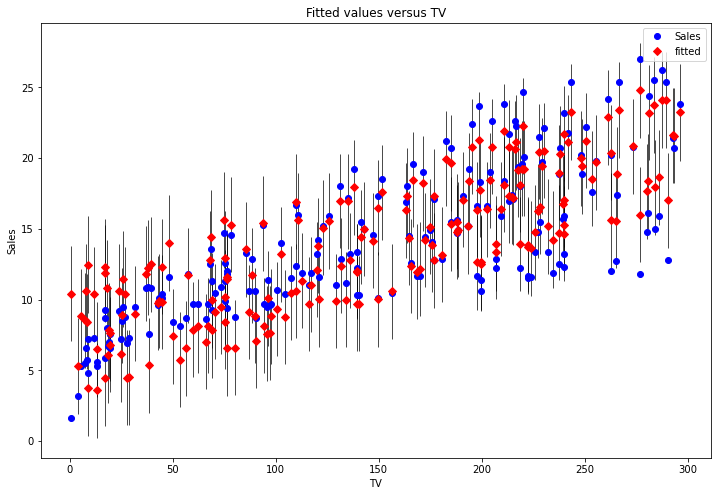

In [143]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_fit(multi_linear, 1, ax=ax)
plt.show()

In [63]:
# fig, ax = plt.subplots(figsize=(12, 8))
# sm.graphics.plot_leverage_resid2(multi_linear, ax=ax)
# plt.show()

## Incorporating Interaction

In [64]:
import statsmodels.formula.api as smf
# fit a model with interaction between features

Interaction = smf.ols(formula='Sales ~ TV*Radio*Newspaper', data=ad_df).fit()
print(Interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     847.3
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          1.16e-140
Time:                        18:38:35   Log-Likelihood:                -267.45
No. Observations:                 200   AIC:                             550.9
Df Residuals:                     192   BIC:                             577.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5559      0

## Independent Variable Transformations

In [ ]:
X = sm.add_constant(pd.DataFrame({'TV': ad_df['TV'],
                                   'sqrt_TV': np.sqrt(ad_df['TV']),
                                   'TV^2': ad_df['TV']**2}))
y = ad_df['Sales']
transform_model = sm.OLS(y, X).fit()
print(transform_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     109.5
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           1.12e-41
Time:                        06:56:04   Log-Likelihood:                -515.24
No. Observations:                 200   AIC:                             1038.
Df Residuals:                     196   BIC:                             1052.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1549      2.124      1.015      0.3

## Build a Linear Regression from Sklearn

In [144]:
x = ad_df[['TV','Radio','Newspaper']]

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [147]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [148]:
print ("Regression model:", (regression_model.coef_))

Regression model: [0.04695205 0.17658644 0.00185115]


In [151]:
regression_model.score(X_train,y_train)

0.8850053786777521

In [152]:
regression_model.score(X_test,y_test)

0.9224605706201435

In [153]:
regression_model.score(x, y)

0.8958544498636362

## Create a regularized RIDGE model and note the coefficients

In [69]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=20)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [0.04695138 0.17645605 0.00188839]


## Create a regularized LASSO model and note the coefficients

In [70]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=30)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [0.04380733 0.04856973 0.        ]


## Comparing the Scores

In [71]:
Reg_Test_Score = regression_model.score(X_test, y_test)
Reg_Train_Score = regression_model.score(X_train, y_train)
Ridge_Test_Score= ridge.score(X_test, y_test)
Ridge_Train_Score= ridge.score(X_train, y_train)
Lasso_Test_Score= lasso.score(X_test, y_test)
Lasso_Train_Score= lasso.score(X_train, y_train)

In [72]:
from IPython.display import display, HTML


In [73]:
model_performance = {
    'Regression': {'Test Score': Reg_Test_Score, 'Train Score': Reg_Train_Score},
    'Ridge': {'Test Score': Ridge_Test_Score, 'Train Score': Ridge_Train_Score},
    'Lasso': {'Test Score': Lasso_Test_Score, 'Train Score': Lasso_Train_Score}
}

In [74]:
Scores = pd.DataFrame(model_performance)
Scores = Scores.T
display(HTML(Scores.to_html()))

,Test Score,Train Score
Regression,0.922461,0.885005
Ridge,0.922384,0.885005
Lasso,0.719306,0.742523


From the above results we can see that Regression model is providing better results